# Анализ данных и проверка гипотез.

В моем распоряжении данные сервиса аренды самокатов о некоторых пользователях из нескольких городов и об их поездках. Моя задача проанализировать данные и проверить следующие гипотезы:

1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
4. Снизилось ли количество обращений в техническую поддержку после обновления серверов ?

### Ход исследоавния:

Данные представлены в трех файлах:
- файл `users_go.csv` содержит информацию о пользователях, их поездках и подписках (уникальный идентификатор, имя пользователя, возраст и тип подписки);
- файл `rides_go.csv` содержит информацию  о поезках (уникальный идентификатор, растояние пройденое за текущую сессию, продолжительность сессии и дата поездки);
- файл `subscriptions_go.csv` содержит информацию о типе подписки (тип подпски, стоимость минуты поездки, стоимость начала поезки, стоимость ежемесячного платежа).

О качестве данных ничего не известно, поэтому сначала необходимо провести обзор данных.
Я проверю данные на ошибки, пропуски и дубликаты, оценю их влияние на исследование. 

Затем на этапе предобработки данных я попробую исправить все ошибки, которые не приведут к искажению конечного результата. Приведу столбцы к необходимому типу данных, создам столбец с номером месяца на основе столбца date, обработаю пропуски и дубликаты.

Далее проведу исследовательский анализ данных, опишу и визуализирую общую информацию о поездках и пользователях, узнаю частоту встречаемости городов и возраст пользователей, соотношение пользователей с подпской и без, продолжительность поездок и растояние пройденное за одну поездку.

Далее объеденю данные полученные из разных файлов в один датафрейм, на его основе создам еще два датафрейма в один из которых войдут пользователи с подпиской, в другой - без подписки. Визуализирую информацию о поездках по типам подписки. 

Создам еще один датафрем с данными о поезках, найду суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, затем добавлю столбец с помесячной выручкой по каждому пользователю. И наконец приступлю к проверке гипотез.

Таким образом, мое исследование пройдет в 9 этапов:
- обзор данных;
- предобработка данных;
- исследовательский анализ информации о пользователях и поезках;
- объеденение данных и визуализация;
- подсчет выручки;
- проверка гипотезы: Тратят ли пользователи с подпиской больше времени на поездки?
- проверка гипотезы: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- проверка гпотезы: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- проверка гипотезы: Снизилось ли количество обращений в техническую поддержку после обновления серверов ?

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd # импортирую библиотеку pandas
from scipy import stats as st # импортирую модуль stats из библиотеки scipy
import seaborn as sns  # импортирую библиотеку seaborn
import math # импортирую библиотеку math
import numpy as np # импортирую библиотеку numpy
import matplotlib.pyplot as plt # импортирую библиотеку matplotlib.pyplot
from math import sqrt

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')  # читаю csv-файл
    rides = pd.read_csv('/datasets/rides_go.csv')  # читаю csv-файл
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')  # читаю csv-файл
except:
    users = pd.read_csv('C:\\Users\\1\\Desktop\\учеба\\python\\Статистический анализ\\users_go.csv')  # читаю csv-файл
    rides = pd.read_csv('C:\\Users\\1\\Desktop\\учеба\\python\\Статистический анализ\\rides_go.csv')  # читаю csv-файл
    subscriptions = pd.read_csv('C:\\Users\\1\\Desktop\\учеба\\python\\Статистический анализ\\subscriptions_go.csv')  # читаю csv-файл

In [3]:
display(users.head()) # вывожу на экран первые 10 строк таблицы users
users.info()  # вывожу на экран общую информацию о таблице users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


При выводе на экран первых строк таблицы `users` с помощью метода `head()` и общей информации о ней с помощью метода `info()` я вижу, что в таблицу отсутствуют пропущенные значения и и все столбцы имеют соответсвующий тип данных.

In [4]:
display(rides.head())  # вывожу на экран первые 10 строк таблицы rides
rides.info()  # вывожу на экран общую информацию о таблице rides

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


При выводе на экран первых строк таблицы `rides` с помощью метода `head()` и общей информации о ней с помощью метода `info()` я вижу, что в таблицу отсутствуют пропущенные значения. Также вижу что столбец `date` имеет тип `object`. Необходимо привести столбец к типу данных `datetime`. В столбце `duration`, в котором указана продолжтельнность сессии в минутах, логично будет округлить данные до целого числа (в большую сторону) и преревести тип данных в `int`

In [5]:
display(subscriptions)  # вывожу на экран первые 10 строк таблицы subscriptions
subscriptions.info()  # вывожу на экран общую информацию о таблице subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


При выводе на экран таблицы `subscriptions` и общей информации о ней с помощью метода `info()` я вижу, что в таблице отсутствуют пропущенные значения и и все столбцы имеют соответсвующий тип данных. Я не использовала метод `head()` т.к. таблица маленькая и легко читается в полном объеме.

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
Данные полученные для исследования почти не требуют предобработки. Необходимо привести работу со столбцами в таблице `rides`: 
- столбец `date` к типу данных `datetime`
- данные в столбце `duration` округлить до целых чисел (в большую сторону) и преревести тип данных в `int`.


#### Шаг 2. Предобработка данных

С помощью функции `to_datetime` изменю тип данных в столбце `date`

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') # заменяю тип на datetime

С помощью метода `ceil` библитеки `numpy` округлю значения в столбце `duration` в большую сторону и с помощью метода `astype()` приведу стобец к типу `int`

In [7]:
rides['duration'] = rides['duration'].apply(np.ceil).astype(int) # округляю значения и привожу к типу int

In [8]:
rides['date'].min() # выведу минимальное значение столбца date

Timestamp('2021-01-01 00:00:00')

In [9]:
rides['date'].max() # виведу максимальное значение столбца date

Timestamp('2021-12-30 00:00:00')

Создам столбец `month` на основе столбца `date` в таблице `rides`. Т.к. данные в столбце `date` представленны за один календарный год, то для заполнения нового столбца воспользуюсь методом `month`

In [10]:
rides['month'] = pd.DatetimeIndex(rides['date']).month # добавлю столбец и заполню его данными о номере месяца

In [11]:
rides.head()  # выведу первые строки таблицы для проверки изменений

,user_id,distance,duration,date,month
0,1,4409.919140,26,2021-01-01,1
1,1,2617.592153,16,2021-01-18,1
2,1,754.159807,7,2021-04-20,4
3,1,2694.783254,19,2021-08-11,8
4,1,4028.687306,27,2021-08-28,8


С помщью методов `duplicated()` и `sum()` найду количество дубликов в таблицах

In [12]:
users.duplicated().sum() # проверяю количество дубликатов в таблице users

31

In [13]:
rides.duplicated().sum() # проверяю количество дубликатов в таблице rides

0

In [14]:
subscriptions.duplicated().sum() # проверяю количество дубликатов в таблице subscriptions

0

Дубликаты имеются только в таблице `users`. С помощью метода `drop_duplicates()` удалю все явные дубликаты, а с помощью `reset_index(drop=True)` обновлю индексы после удаления.

In [15]:
users = users.drop_duplicates().reset_index(drop=True) # удаляю явные дубликаты в таблице users

In [16]:
users.duplicated().sum() # проверяю количество дубликатов после удаления

0

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
В ходе предобработки данных я изменила тип данных в столбце `date`. В столбце `duration` округлила значения мнут в большую сторону и привела столбец к типу `int`.
    
Создала новый столбец и заполнила его номерами месяцев совершения поездки
    
Также провела проверку на наличие явных дубликатов и удалила их.
    
Данные готовы к следующему этапу работы.

#### Шаг 3. Исследовательский анализ данных

Для того, чтобы узнать частоту встречаемости городов я воспользуюсь методом `value_counts()` и посчитаю сколько раз и какие города встречаются в таблице.

In [17]:
count_city = users['city'].value_counts() # посчитаю частоту встречаемости и запишу в новую переменную
count_city  # выведу результат

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Построю круговую диаграмму на которой будет отображена частота встречаемости городов в процентном соотношении.
Для этого воспользуюсь методом `plot` с параметром `kind='pie'`.

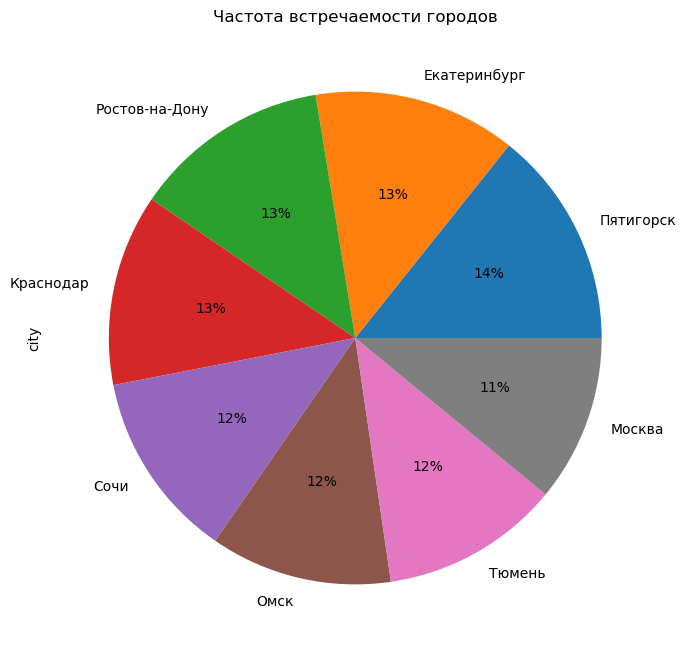

In [18]:
users['city'].value_counts().plot(   # вывожу круговую диаграмму
    kind = 'pie', 
    y = count_city,
    autopct = '%1.0f%%',
    figsize=(8, 8), 
    title = 'Частота встречаемости городов');

По диаграмме я вижу что процент встречаемости городов почти одинаковый, максимальная разница в 3%.

Для того, чтобы узнать соотношение пользователей с подпиской и без подписки я воспользуюсь методом `value_counts()` и посчитаю сколько раз каждый из вариантов встречаются в таблице.

In [19]:
count_subscription = users['subscription_type'].value_counts() # посчитаю частоту встречаемости и запишу в новую переменную
count_subscription  # выведу результат

free     835
ultra    699
Name: subscription_type, dtype: int64

Также построю круговую диаграмму на которой будет отображен процент пользователей с подпиской и пользователей без подписки.
Для этого воспользуюсь методом `plot` с параметром `kind='pie'`.

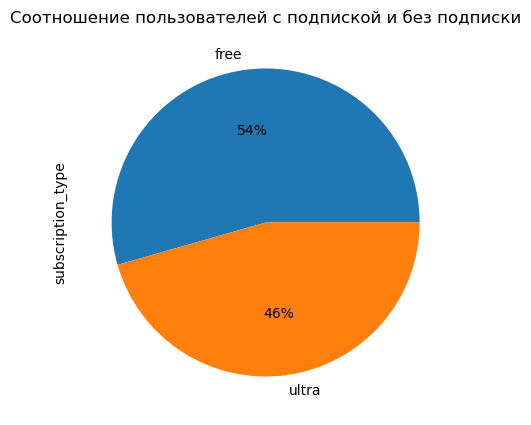

In [20]:
users['subscription_type'].value_counts().plot(    # вывожу круговую диаграмму
    kind = 'pie', 
    y = count_subscription,
    autopct = '%1.0f%%',
    figsize=(5, 5), 
    title = 'Соотношение пользователей с подпиской и без подписки');

In [21]:
54-46  

8

По диаграмме я вижу что пользователей без подписки больше на 8%

Для того, чтобы узнать информацию о возрасте пользователей воспользуюсь метедом `describe()` и выведу сводную информацию о столбце.

In [22]:
users['age'].describe()  # вывожу сводные данные

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

С помощью метода `hist` построю гистограмму и узнаю количество пользователей распределенных по возрасту.

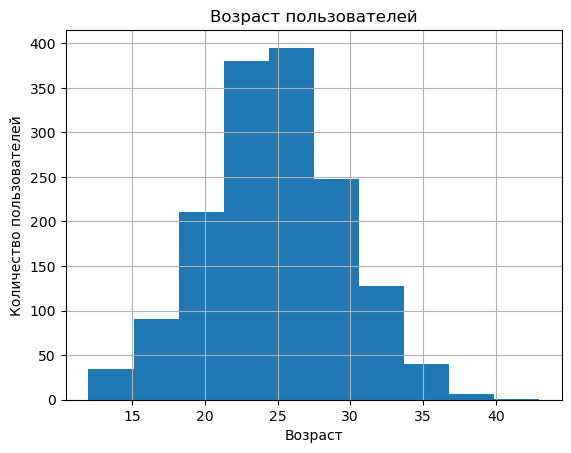

In [23]:
plt.hist(users['age'])   # вывожу гистограмму
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Я в ходе анализа я узнала, что средний возраст пользователей сервиса аренды самокатов 25 лет. Больше всего пользователей в возрасте от 24 до 27 лет.

Для того, чтобы узнать расстояние, которое пользователь преодолел за одну поездку я воспользуюсь метедом describe() и выведу сводную иформацию о столбце.

In [24]:
rides['distance'].describe()  # вывожу сводные данные

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

С помощью метода `hist` построю гистограмму и узнаю как распределяется расстояние одной поездки по кол-ву пользователей.

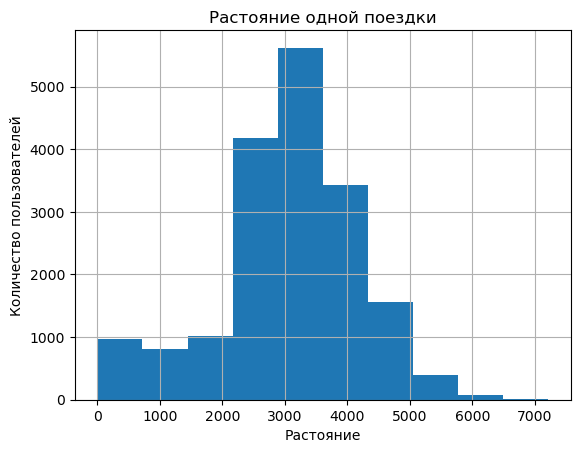

In [25]:
plt.hist(rides['distance'])   # вывожу гистограмму
plt.title('Растояние одной поездки')
plt.xlabel('Растояние')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

С помощью метода `boxplot` построю диаграмму размаха и узнаю есть ли в данных возможные выбросы.

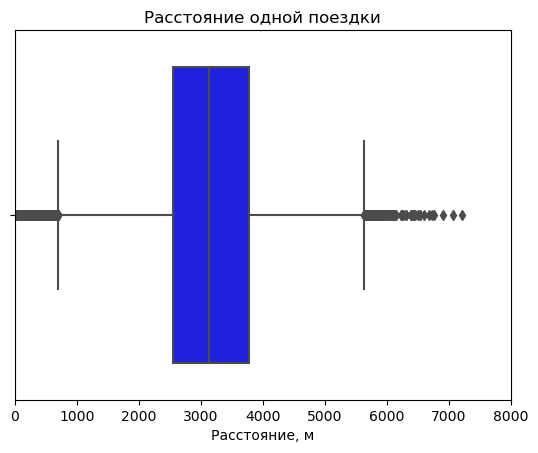

In [26]:
sns.boxplot(x=rides['distance'], color='blue') #строим диаграмму размаха
plt.title('Расстояние одной поездки')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 8000)

На гистограмме я вижу, что в основном пользователи преодолевают от 2100 м до 5000 за одну сессию, однако "ящик с усами" говорит о том, что показатели до 800 м и больше 5600 м это возможные выбросы и в основном пользователи преодолевают от 2543 м  до 3776 м. (такие точные цифры я взяла из результата метода describe)

Для того, чтобы узнать продолжительность поездок я воспользуюсь метедом describe() и выведу сводную иформацию о столбце.

In [27]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

С помощью метода `boxplot` построю диаграмму размаха и узнаю есть ли в данных возможные выбросы.

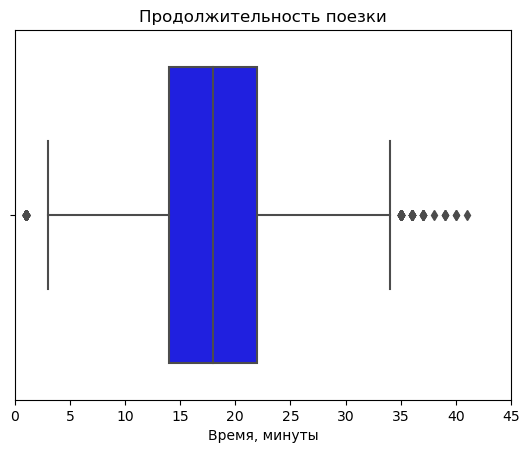

In [28]:
sns.boxplot(x = rides['duration'], color='blue')
plt.title('Продолжительность поезки')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)

На диаграмме размаха я вижу, что продолжительность поездки до 2 минут и больше 34 минут это возможные выбросы и в основном пользователи пользуются самакатами от 13 минут до 21 минуты за одну сессию.

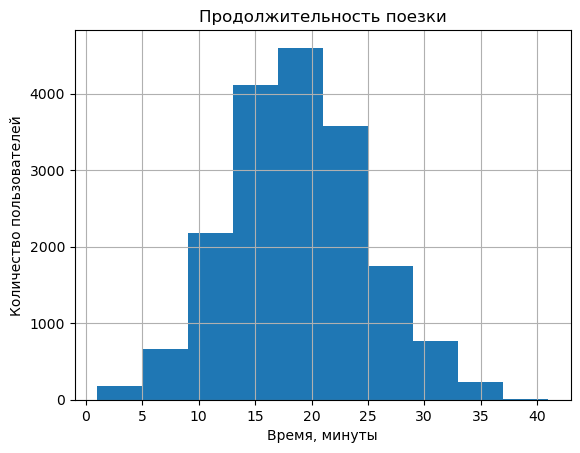

In [29]:
plt.hist(rides['duration'])   # вывожу гистограмму
plt.title('Продолжительность поезки')
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

На гистограмме видно что самый пик продолжительности поездки находится в диапазоне от 17 до 21 минуты.

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
Частота встречаемости городов практически одинакова, в г. Пятигорске самое большое кол-во позьзователей, а в г. Москве самое маленькое.
    
Пользователей без подписки - 54%, пользователей с подпиской - 46%, соответсвенно пользователей без подписки больше на 8%.
    
Чаще всего сервисом аренды самокатов пользуются люди в возрасте  от 24 до 27 лет. Минимальный возраст пользователя - 12 лет, а максимальный - 43 года.
    
В основном пользователи преодолевают за одну поездку от 2500 м  до 3800 м. Самое маленькое расстояние, пройденное за одну поездку - 0.85 м, а самое большое - 7211 м. Предположу что растояния до 800 м действительно являются выбросами, т.к. кажутся очень маленькими для поездки на самокате.
    
В основном продолжительность поездки на самокате составляет от 13 минут до 21 минуты за одну сессию. Минимальная продолжительность поездки 0.5 минуты, что очень мало и скорее всего пользователь просто передумал брать самокат, а максимальная продолжительность поездки почти 41 минуту. Думаю логично считать поедки до 2 минут выбросами.
    


#### Шаг 4. Объединение данных

Объединю данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуюсь методом `merge()`.

Проведу проверку размерности датасетов до объединения.

In [30]:
users.shape # проверяю датафрейм users

(1534, 5)

In [31]:
rides.shape  # проверяю датафрейм rides

(18068, 5)

In [32]:
subscriptions.shape  # проверяю датафрейм subscriptions

(2, 4)

In [33]:
data = users.merge(rides)  # объеденю таблицы users и rides

In [34]:
data = data.merge(subscriptions)  # объединю получившуюся таблицу с subscriptions

In [35]:
data.head() # выведу первые 5 строк таблицы

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


Проведу проверку размерности объедененного датасета.

In [36]:
data.shape

(18068, 12)

In [37]:
data.isna().sum()  # проверим на наличие пропусков

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество строк объедененного датасета соответсвует количеству строк самого большого датасета до объединения. Пропусков в data нет, все данные заполнились.

На основе объедененной таблицы создам таблицу c данными о пользователях без подписки, для этого использую `loc` и сохраню в новом датафрейме только те строки исходной таблицы, в которых указаны пользователи без подписки.

In [38]:
no_sub = data.loc[data['subscription_type'] == 'free'] 
no_sub # выведу таблицу на экран

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


Проделаю тоже самое, но уже для пользователей с подпиской.

In [39]:
ultra_sub = data.loc[data['subscription_type'] == 'ultra']
ultra_sub # выведу таблицу на экран

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16,2021-10-17,10,6,0,199


Визуализирую информацию о расстоянии поездок для пользователей без подписки с помощью метода `hist`.

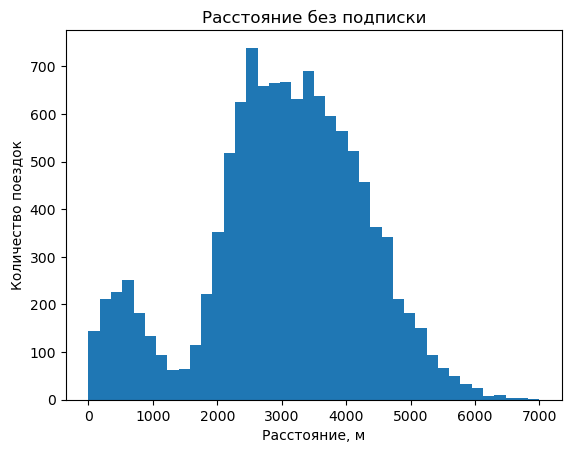

<Figure size 2000x2000 with 0 Axes>

In [40]:
plt.hist(no_sub['distance'], bins=40, range = (0, 7000))  # строю гистограмму
plt.title('Расстояние без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

В основном расстояние преодалеваемое пользователем за одну поездку варьируется от 2000 м до 4500 м.

Визуализирую информацию о времени поездок для пользователей без подписки с помощью метода `hist`.

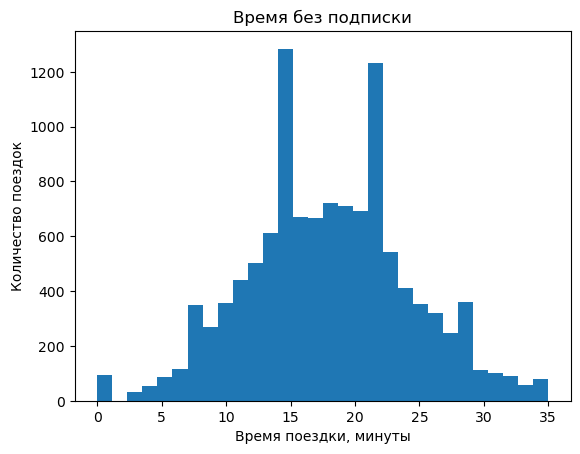

<Figure size 2000x2000 with 0 Axes>

In [41]:
plt.hist(no_sub['duration'], bins=30, range = (0, 35))  # строю гистограмму
plt.title('Время без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

В основном время поезки составляет от 10 до 23 минут.

Визуализирую информацию о расстоянии поездок для пользователей с подпиской  с помощью метода `hist`.

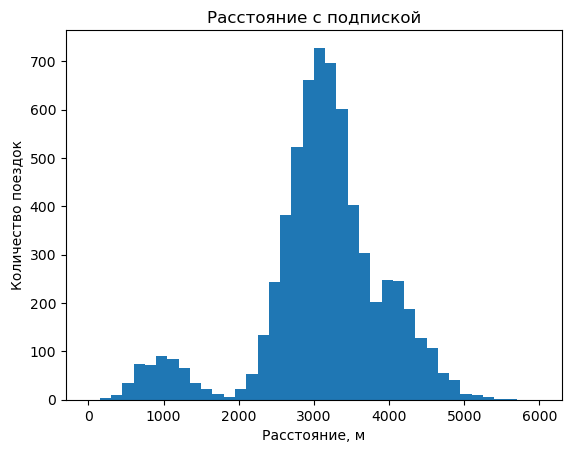

<Figure size 2000x2000 with 0 Axes>

In [42]:
plt.hist(ultra_sub['distance'], bins=40, range = (0, 6000))   # строю гистограмму
plt.title('Расстояние с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

В основном пользователи с подпиской за одну поездку проезжают от 2500 до 3500 м.

Визуализирую информацию о времени поездок для пользователей с подпиской с помощью метода `hist`.

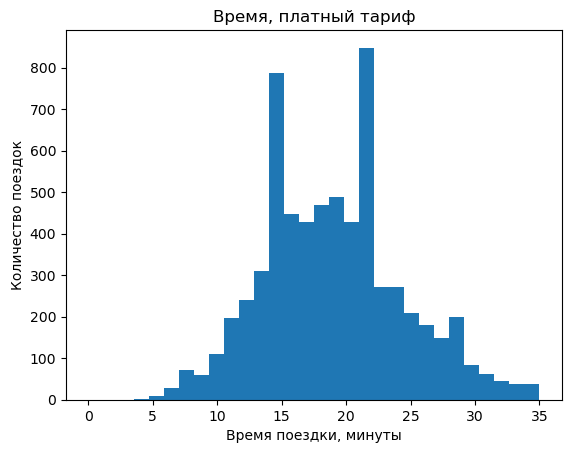

<Figure size 2000x2000 with 0 Axes>

In [43]:
plt.hist(ultra_sub['duration'], bins=30, range = (0, 35))   # строю гистограмму
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

В основном пользователи с подпиской тратят от 12 до 22 минут на поездку.

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
На данном этапе я объеденила все имеющиеся у меня данные в одну таблицу, затем на основе получившейся таблицы создала еще две таблицы. В одной из них хранятся данные по пользователям без подписки, в другой - с подпиской.
    
Для пользователей без подписки растояние пройденное за одну поездку в среднем составляет от 2000 м до 4500 м, а время - от 10 до 23 минут.
    
Для пользователей с подпиской среднее растояние пройденное за одну поездку находится в диапазоне от от 2500 до 3500 м, а время поездки - от 12 до 22 минут.
    
Таким образом, можно сделать вывод, что пользователи без подписки в среднем проезжают большее расстояние, чем пользователи с подпиской, однако время сессий промерно одинаковое.

#### Шаг 5. Подсчёт выручки

Создам таблицу с агрегированными данными о поездках на основе общей таблицы `data`.
Для этого с помощью метода `pivot_table` создам таблицу в которой подсчитаю суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также столбец о типе подписки.

Для начала проведем округление значений в столбце `duration` в большую сторону

In [44]:
data['duration'] = np.ceil(data['duration']) # округлим данные в столбце duration в большую сторону

In [45]:
pivot_data = pd.pivot_table(data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': 'sum', 
                                      'duration' : 'sum', 
                                      'name' : 'count',
                                      'subscription_type' : min})

In [46]:
pivot_data.rename(columns = {'name' : 'count_trip'}, inplace = True) # переименнуем столбец

In [47]:
pivot_data # выведем таблицу

distance  duration  count_trip subscription_type
month user_id                                                     
1     1        7027.511294      42.0           2             ultra
      3        3061.777147      13.0           1             ultra
      5        3914.646990      13.0           1             ultra
      7        6478.080979      28.0           2             ultra
      12       3577.151148      33.0           1             ultra
...                    ...       ...         ...               ...
12    1525     4597.854350      34.0           1              free
      1526     3644.121544      23.0           1              free
      1528     3998.569324      11.0           1              free
      1532     6111.889853      42.0           2              free
      1534     2371.711192      16.0           1              free

[11331 rows x 4 columns]

Напишу собственную функцию для подсчета помесячной выручки от каждого пользователя.  Данные о ценах я взяла из информации об условиях оплаты для подписчиков и тех, у кого нет подписки:
1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [48]:
# напишу функцию
def revenue(string):   
    if string['subscription_type'] == 'ultra':
        return 6 * string['duration'] + 199
    else:
        return 8 * string['duration'] + 50 * string['count_trip']

In [49]:
# создаю новый столбец и записываю в него информацию с помощью вызова функции revenue
pivot_data['revenue_month'] = pivot_data.apply(revenue, axis=1)

In [50]:
pivot_data # выведу обновленную таблицу

distance  duration  count_trip subscription_type  \
month user_id                                                        
1     1        7027.511294      42.0           2             ultra   
      3        3061.777147      13.0           1             ultra   
      5        3914.646990      13.0           1             ultra   
      7        6478.080979      28.0           2             ultra   
      12       3577.151148      33.0           1             ultra   
...                    ...       ...         ...               ...   
12    1525     4597.854350      34.0           1              free   
      1526     3644.121544      23.0           1              free   
      1528     3998.569324      11.0           1              free   
      1532     6111.889853      42.0           2              free   
      1534     2371.711192      16.0           1              free   

               revenue_month  
month user_id                 
1     1                451.0  
      3                277.0  
      5                277.0  
      7                367.0  
      12               397.0  
...                      ...  
12    1525             322.0  
      1526             234.0  
      1528             138.0  
      1532             436.0  
      1534             178.0  

[11331 rows x 5 columns]

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
На данном этапе я создала новую таблицу `pivot_data` с агрегированными данными о поездках в которую добавила суммарную дистанцию, суммарное время для каждого пользователя за каждый месяц, кол-во поездок и тип подписки на основе общей таблицы `data`.
    
Округлила время поездок в большую сторону.
    
Добавила новый столбец `revenue_month` в который записала данные о выручке от каждого пользователя за месяц.

#### Шаг 6. Проверка гипотез

Мне необходимо проверить гипотезу, которая гласит следующее: "Тратят ли пользователи с подпиской больше времени на поездки?" 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Для проверки данной гипотезы воспользуюсь данными о продолжительности поездок пользователей из таблицы `no_sub` для пользователей без подписки и из таблицы `ultra_sub` для пользователей с подпиской. 

Проверить данную гипотезу можно с помощью проверки равенства средних двух генеральных совокупностей, для этого задам нулевую и альтернативную гипотезы:
H0 - "Среднее время поезки пользователей с подпиской равно среднему времени поездки пользователей без подписки".
H1 - "Среднее время поезки пользователей с подпиской больше среднего времени поездки пользователей без подписки".
Осуществлю проверку гипотезы с помощью  метода `ttest_ind`.

In [51]:
ultra = ultra_sub['duration'] 

free = no_sub['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


В результате проведения t-теста нулевая гипотеза была отвергнута, в пользу гипотезы о том, что пользователи с подпиской тратят больше времени на поездки.   

Исходя из результатов t-теста я могу сделать вывод, что пользователи с подпиской могут быть выгоднее для компании.

Далее необходимо проверить гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.


Для проверки данной гипотезы воспользуюсь данными о растоянии поездок пользователей из таблицы `ultra_sub`.

Проверить данную гипотезу можно с помощью проведения проверки односторонних гипотез, для этого задам нулевую и альтернативную гипотезы:
H0 - "Среднее растояние поезки которое проезжают пользователи с подпиской за одну поездку, равняется 3130 метрам".
H1 - "Среднее растояние поезки которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров".
Осуществлю проверку гипотезы с помощью  метода `ttest_1samp`.

In [52]:
ultra_dist = ultra_sub['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


В результате проведения t-теста нулевая гипотеза не была отвергнута и можно считать, что среднее растояние поезки которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Далее необходимо проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Для проверки данной гипотезы воспользуюсь данными о выручке от пользователей по месяцам из таблицы `pivot_data`.

Снова воспользуюсь методом `ttest_ind`, для этого задам нулевую и альтернативную гипотезы:
H0 - "Средняя выручка от пользователей с подпиской равна средней выручке от пользователей без подписки".
H1 - "Средняя выручка от пользователей с подпиской больше средней выручке от пользователей без подписки".

In [53]:
ultra = pivot_data.loc[pivot_data.subscription_type == 'ultra', 'revenue_month'] 

free = pivot_data.loc[pivot_data.subscription_type == 'free', 'revenue_month'] 


results = st.ttest_ind(ultra, free, alternative = 'greater')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


В результате проведения t-теста нулевая гипотеза была отвергнута и можно считать, что пользователи с подпиской приносят компании больше денег в месяц, чем пользователи без подписки.

Представте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:

Для провреки данной гипотезы необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2правостороннюю 
H1 : μ1 > μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Для проверки такой гипотезы в Python используют метод `scipy.stats.ttest_rel()` которому передаются два парамента - наборы данных до и после изменения, а также `alternative='greater'` чтобы проверить правостороннюю гипотезу о том, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения. Следует учесть что совокупности данных должны быть одинаковыми по размеру и порядкок объектов в данных тоже будет одинаковый.

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
В результате проверок гипотез я подтветдила гипотезу о том, что что пользователи с подпиской тратят больше времени на поездки и гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Также я отвергла гипотезу о том, что то среднее растояние поезки которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

На основании этого могу сделать вывод, что пользователи с подпиской приносят компании больше денег, чем пользователи без подписки.
Также можно сделать вывод, что самокаты изнашиваются быстрее, чем рассчитано при оптимальных условиях.


#### Шаг 7. Распределения

 **Задача № 1.**
Отделу маркетинга поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают -
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

С этим заданием я голову сломала, не могу понять. Я поняла только, что нам нужно найти n, мы знаем p=0.1 (это те 10%, что продлевают подписку), положительных исходов должно быть минимум 100, но я не понимаю как это обозначить и как обозначить, что вероятность выполнения плана должна быть около 95% тоже.. подскажите пожалуйста

**Задача № 2.**
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15.37 %


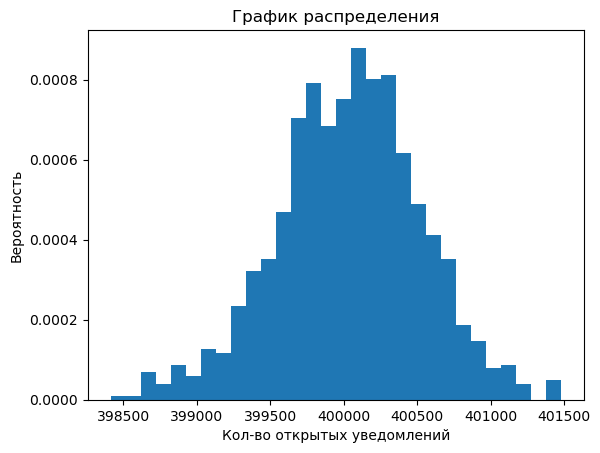

In [54]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

s = np.random.normal(mu, sigma, 1000)

plt.hist(s, 30, density=True)
plt.title('График распределения')
plt.xlabel('Кол-во открытых уведомлений')
plt.ylabel('Вероятность');

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна {round(result * 100, 2)} %')

<div style="border:solid orange 2px; padding: 20px">   
    
**Общий вывод:** В ходе работы проектом я проанализировала данные и провела проверку гипотез, для того, чтобы помочь популярному сервису аренды самокатов вырасти. 
    
Среднестатистический клиент данного сервиса - человек в возрасте около 25 лет, который проезжает за одну поездку от 2500 до 3800 метров, и среднее время поездки которого составляет от 13 до 21 минуты.
    
**Были проверены следующие гипотезы:**
- Тратят ли пользователи с подпиской больше времени на поездки? 
В результате проверки я не смогла отвергнуть данную гипотезу, следовательно я могу сделать вывод, что пользователи с подпиской действительно тратят больше времени на поездки.
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  
Данную гипотезу отвергнуть не удалось, и я могу сделать вывод, что пользователи с подпиской за одну поездку проезжают не более 3130 м , следовательно за дополнительный износ самокатов можно не переживать.
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
Я не смогла отвергнуть данную гипотезу и могу сделать вывод, что пользователи с подпиской действительно приносят большую выручку, чем пользователи без подписки.


Также в задании была представлена ситуация в которой нужно было определить, какой тест нужен для проверки следующей гипотезы:    "Снизилось ли количество обращений в техническую поддержку после обновления серверов ?". Для проверки данной ситуации можно воспользоваться гипотезой о равенстве средних для зависимых (парных) выборок, где к нулевой гипотезе средние значения количество обращений в техподдержку до обновления равны средним значениям количества обращений в техподдержку после обновления, а в альтернативной гипотезе средние значения первой совокупности будут больше средних значений второй совокупности. В Python для этого используют метод `scipy.stats.ttest_rel()` с параметром `alternative='greater'`.
    
**В ходе выполнения данного проекта я провела следующую работу:**
- создала три датафрейма `users`, `rides` и `subscriptions` и добавила в них содержание csv-файлов;
- вывела о них общую информацию, узнала, что в данных отсутсвуют пропуски;
- привела столбец `date` к нужному типу данных;
- в столбце `duration` округлила данные в большую сторону и привела столбец к типу данных `int`;
- проверила данные на наличие явных дубликатов и удалила их;
- узнала частоту встречаемости городов и построила круговую диаграмму на которой в процентном соотношении представила встречаемость городов в данных, узнала что процент встречаемости почти одинаковый у всех городов представленных в данных;
- узнала что пользователей без подписки больше на 8%, для этого построила круговую диаргамму;
- узнала информацию о возрасте пользователей, для этого использовала метод describe() и построила гистрограмму, выяснла, что средний возраст пользователя 25 лет, а большинство пользователей в возрасте от 24 до 27 лет;
- узнала, что основном пользователи преодолевают от 2543 м до 3776 м за одну поездку, для этого воспользовалась методом describe(), построила гистрограмму и диаграмму размаха;
- узнала среднюю продолжительность одной поездки - от 13 минут до 21 минуты, для этого использовала метод describe() и построила диаграмму размаха с помощью метода boxplot;
- объеденила данные  о пользователях, поездках и подписках в один датафрейм с помощью метода merge();
- создала два новых датафрейма в которых пользователи разделены по наличию подписки или ее отсутсвию;
- построила гисторгаммы отражающие время пользования самокатом для пользователей с подпиской и без нее;
- построила гисторгаммы отражающие расстояния поездок для пользователей с подпиской и без нее;
- по гистограммам определила, что пользователи без подписки преодалевают чуть большие расстояния, однако время сессий у обоих категорий примерно одинаковое;
- с помощью метода pivot_table создла таблицу в которой подсчитала суммарное расстояние, количество поездок и суммарное время и тип подписки для каждого пользователя за каждый месяц;
- написала обственную функцию для подсчета помесячной выручки от каждого пользователя;
- с помощью метода ttest_ind проверила первую гипотезу;
- с помощью метода ttest_1samp проверила вторую гипотезу;
- с помощью метода ttest_ind проверила третью гипотезу гипотезу;
- определила, что с помощью гипотезы о равенстве средних для зависимых (парных) выборок можно проверить четвертую гипотезу.
    
    
**Рекомендации заказчику:**

1. Я выяснила, что пользватели с подпиской приносят больший доход, и считаю целесообразным переодически проводить компании по увеличению продаж подписок.
 

    